## Clustering pipeline example

### Imports and global opts

In [1]:
import os

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from ipywidgets import interact, widgets

from plot import PlotScores

opts = {
        'mice': ['A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21'],
        'data_dir': os.path.join(os.path.dirname(os.path.realpath('__file__')), 'data'),
        'results_dir': os.path.join(os.path.dirname(os.path.realpath('__file__')), 'results')
        }

### Local opts, load data, analyze, save results

In [54]:
# set local opts
opts.update({
            'min_clusters': 2,
            'max_clusters': 10
            })
 
for mouse in tqdm(opts['mice']):
    # load the subject's data
    data = np.load(os.path.join(opts['data_dir'], f'{mouse}_data.npy'))
    # find the scores per n_clusters
    labels_per_n_clusters = [KMeans(n_clusters=n_clusters).fit(data).labels_
                            for n_clusters in range(opts['min_clusters'], opts['max_clusters']+1)]
    scores_per_n_clusters = [silhouette_score(data, labels) for labels in labels_per_n_clusters]
    # save the scores to file
    np.save(os.path.join(opts['results_dir'], f'{mouse}_scores.npy'), scores_per_n_clusters)

  0%|          | 0/10 [00:00<?, ?it/s]

### Load results, interactive plot, save figure

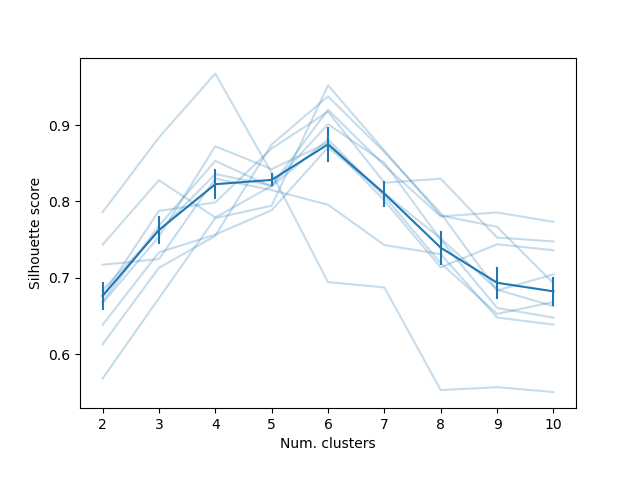

In [10]:
%matplotlib widget


# load the scores
all_scores = {mouse: np.load(os.path.join(opts['results_dir'], f'{mouse}_scores.npy')) for mouse in opts['mice']}

# interactive plot
plot_scores = PlotScores(all_scores, opts)
widgets.VBox([plot_scores.mouse])

